In [27]:
#importing the required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
from scipy.fft import fft,fftfreq
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

In [28]:
#loading the dataset using pandas
data = pd.read_csv(r"archive\PowerQualityDistributionDataset1.csv")


In [29]:
data.shape

(11998, 130)

In [30]:
data.drop(data.columns[[0]],axis=1,inplace=True)
data.shape

(11998, 129)

In [31]:
data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col120,Col121,Col122,Col123,Col124,Col125,Col126,Col127,Col128,output
0,-797.962914,-1320.199586,-1828.741445,-2319.935857,-2789.218649,-3231.111864,-3641.962908,-4018.119193,-4355.929647,-4650.829055,...,3632.834002,3221.982426,2780.090228,2311.720161,1821.438861,1311.983509,790.659456,262.031836,-269.335205,1
1,4387.885674,4567.747164,4693.741356,4776.824895,4824.300958,4850.777519,4862.646175,4867.211521,4866.298624,4858.081691,...,-165.252287,524.062959,1199.684611,1842.437384,2437.714882,2972.733259,3437.450839,3828.215741,4143.201102,2
2,-4050.074299,-4340.408587,-4576.875995,-4769.518913,-4918.338175,-5025.159834,-5100.026323,-5141.111052,-5153.892968,-5137.458861,...,563.322919,-47.475988,-656.447463,-1252.637741,-1825.089177,-2364.673580,-2861.346591,-3309.630078,-3706.785897,2
3,3458.450134,3686.700705,4000.773209,4392.451258,4834.343975,5269.845213,5636.871457,5876.078192,5950.944421,5841.384319,...,-722.183210,67.562203,850.005032,1561.232918,2152.858410,2601.141643,2912.474970,3123.378574,3286.805684,3
4,-910.262100,-312.245917,298.552078,896.568469,1462.629392,1978.474763,2439.540162,2847.652177,3212.852886,3547.924521,...,-4506.574476,-4196.154858,-3881.168803,-3560.705563,-3225.633496,-2860.433401,-2452.321914,-1991.255895,-1474.497200,3


In [32]:
data_arr = data.to_numpy()

In [33]:
transform = StandardScaler()
data_norm = transform.fit_transform(data_arr)

In [34]:
data_norm_fft = data_arr.copy()
n = data_norm_fft.shape[0]

In [35]:
print(n)

11998


In [36]:
for i in range(0,n):
    data_norm_fft[i] = np.append(np.abs(fft(data_norm_fft[i][0:128])),data_norm_fft[i][128])
transform = StandardScaler()
data_norm_fft = transform.fit_transform(data_norm_fft)

In [37]:
data_norm_fft

array([[-0.38745849, -0.47114005, -0.0950949 , ..., -0.0950949 ,
        -0.47114005, -1.54325094],
       [-0.38922425, -0.47041909, -0.09525879, ..., -0.09525879,
        -0.47041909, -0.83109998],
       [-0.38932812, -0.47076475, -0.09532833, ..., -0.09532833,
        -0.47076475, -0.83109998],
       ...,
       [-0.02042745, -0.37964023,  0.56467379, ...,  0.56467379,
        -0.37964023,  1.30535287],
       [ 0.12781022, -0.40718176,  0.5006483 , ...,  0.5006483 ,
        -0.40718176,  1.30535287],
       [ 0.37683422, -0.33699688,  0.4151379 , ...,  0.4151379 ,
        -0.33699688,  1.30535287]])

class Normal wave


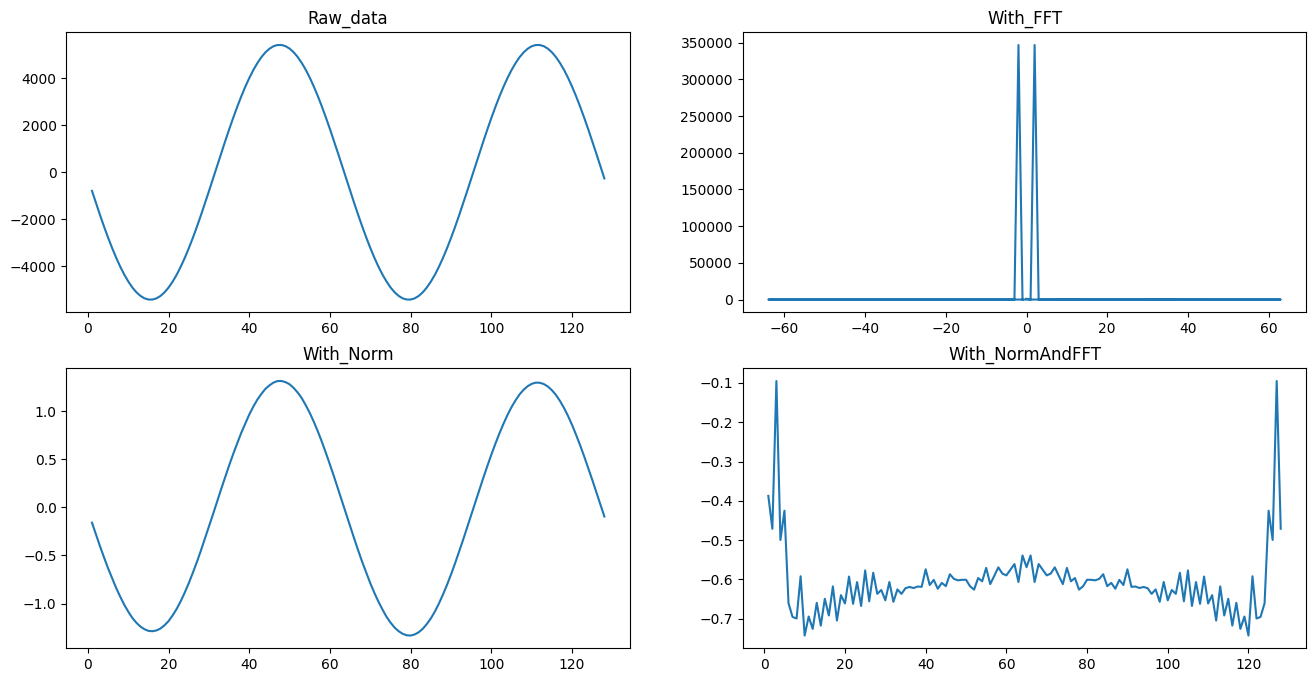

In [38]:
print("class", "Normal wave")
fig, axes = plt.subplots(2, 2,figsize=(16,8))

#raw data
axes[0][0].plot([i for i in range(1,129)], data_arr[0][0:128])
axes[0][0].title.set_text('Raw_data')

#with fft
yf = fft(data_arr[0][0:128])
xf = fftfreq(128,1/128)
axes[0][1].plot(xf, np.abs(yf))
axes[0][1].title.set_text('With_FFT')

#after normalization
axes[1][0].plot([i for i in range(1,129)], data_norm[0][0:128])
axes[1][0].title.set_text('With_Norm')

#with normalization and fft
axes[1][1].plot([i for i in range(1,129)], data_norm_fft[0][0:128])
axes[1][1].title.set_text('With_NormAndFFT')

class 3rd harmonic wave


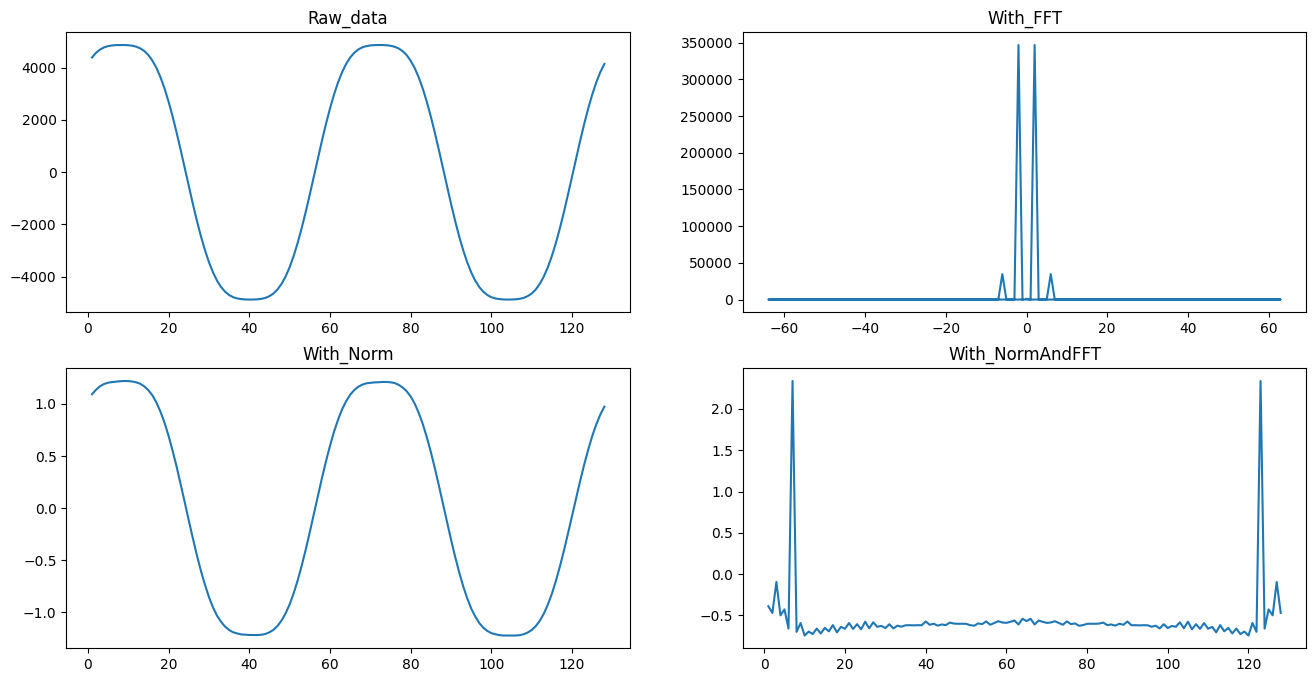

In [39]:
print("class", "3rd harmonic wave")
fig, axes = plt.subplots(2, 2,figsize=(16,8))

#raw data
axes[0][0].plot([i for i in range(1,129)], data_arr[1][0:128])
axes[0][0].title.set_text('Raw_data')

#with fft
yf = fft(data_arr[1][0:128])
xf = fftfreq(128,1/128)
axes[0][1].plot(xf, np.abs(yf))
axes[0][1].title.set_text('With_FFT')

#after normalization
axes[1][0].plot([i for i in range(1,129)], data_norm[1][0:128])
axes[1][0].title.set_text('With_Norm')

#with normalization and fft
axes[1][1].plot([i for i in range(1,129)], data_norm_fft[1][0:128])
axes[1][1].title.set_text('With_NormAndFFT')

class 5th harmonic wave


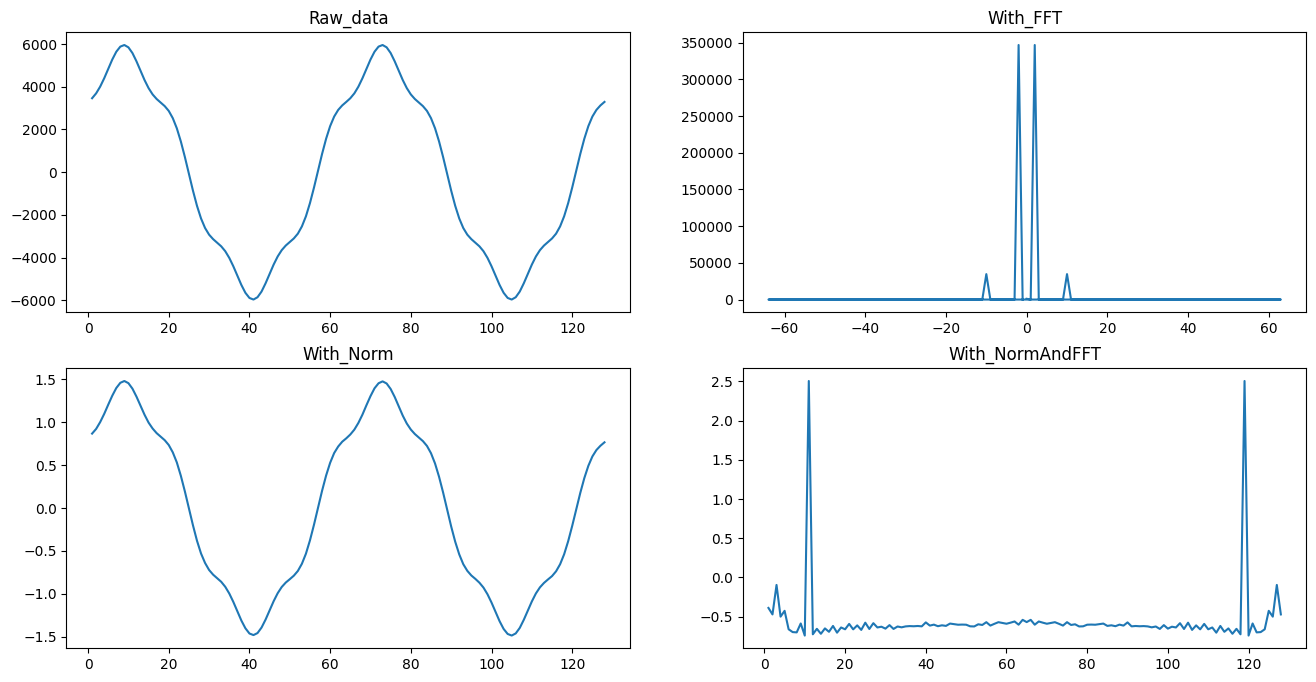

In [40]:
print("class", "5th harmonic wave")
fig, axes = plt.subplots(2, 2,figsize=(16,8))

#raw data
axes[0][0].plot([i for i in range(1,129)], data_arr[3][0:128])
axes[0][0].title.set_text('Raw_data')

#with fft
yf = fft(data_arr[3][0:128])
xf = fftfreq(128,1/128)
axes[0][1].plot(xf, np.abs(yf))
axes[0][1].title.set_text('With_FFT')

#after normalization
axes[1][0].plot([i for i in range(1,129)], data_norm[3][0:128])
axes[1][0].title.set_text('With_Norm')

#with normalization and fft
axes[1][1].plot([i for i in range(1,129)], data_norm_fft[3][0:128])
axes[1][1].title.set_text('With_NormAndFFT')

class Voltage dip


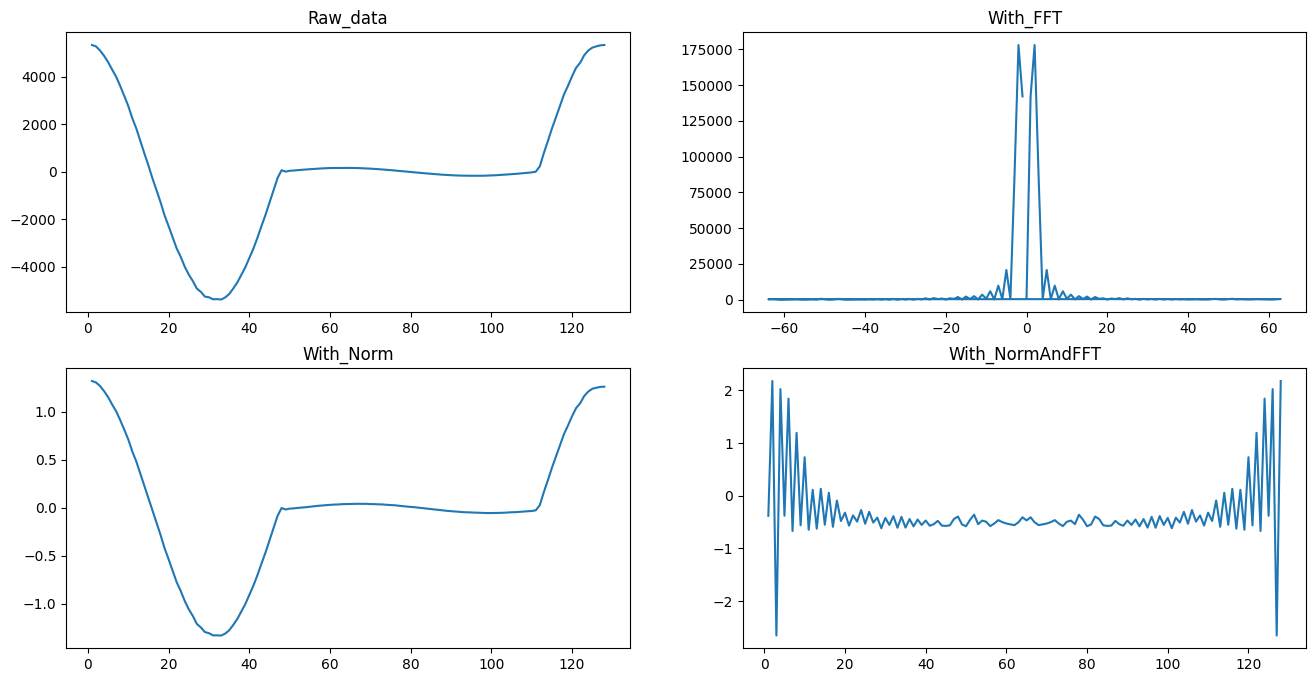

In [41]:
print("class", "Voltage dip")
fig, axes = plt.subplots(2, 2,figsize=(16,8))

#raw data
axes[0][0].plot([i for i in range(1,129)], data_arr[6][0:128])
axes[0][0].title.set_text('Raw_data')

#with fft
yf = fft(data_arr[6][0:128])
xf = fftfreq(128,1/128)
axes[0][1].plot(xf, np.abs(yf))
axes[0][1].title.set_text('With_FFT')

#after normalization
axes[1][0].plot([i for i in range(1,129)], data_norm[6][0:128])
axes[1][0].title.set_text('With_Norm')

#with normalization and fft
axes[1][1].plot([i for i in range(1,129)], data_norm_fft[6][0:128])
axes[1][1].title.set_text('With_NormAndFFT')

class Transient wave


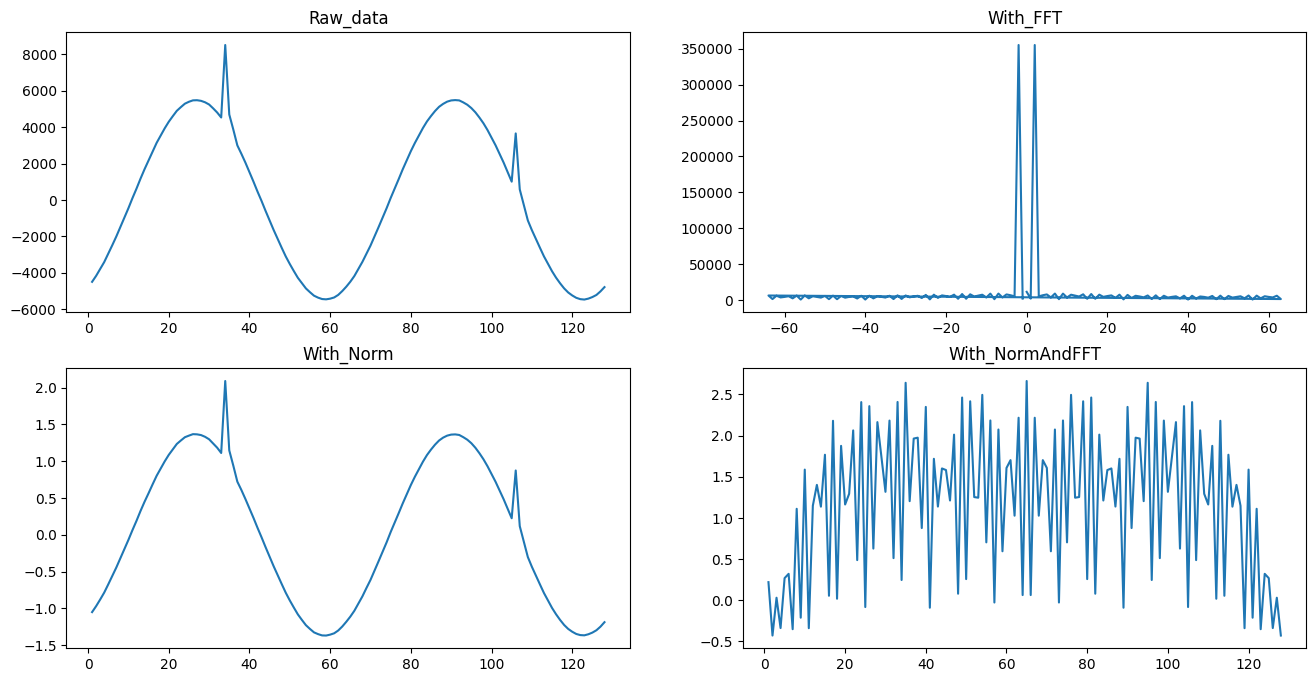

In [42]:
print("class", "Transient wave")
fig, axes = plt.subplots(2, 2,figsize=(16,8))

#raw data
axes[0][0].plot([i for i in range(1,129)], data_arr[8][0:128])
axes[0][0].title.set_text('Raw_data')

#with fft
yf = fft(data_arr[8][0:128])
xf = fftfreq(128,1/128)
axes[0][1].plot(xf, np.abs(yf))
axes[0][1].title.set_text('With_FFT')

#after normalization
axes[1][0].plot([i for i in range(1,129)], data_norm[8][0:128])
axes[1][0].title.set_text('With_Norm')

#with normalization and fft
axes[1][1].plot([i for i in range(1,129)], data_norm_fft[8][0:128])
axes[1][1].title.set_text('With_NormAndFFT')

In [43]:
#here we are splitting the dataset in the ratio of 60%,20%,20% (training set,validation set, test set)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.loc[:,data.columns != 'output'],data['output'],test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

In [44]:
#here we are overwritting the dataframe with the waves which we obtained after doing fourier transformation
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_val = x_val.to_numpy()

In [45]:
#here we are performing normalization
transform = StandardScaler()
x_train_tr = transform.fit_transform(x_train)
x_test_tr = transform.fit_transform(x_test)
x_val_tr = transform.fit_transform(x_val)

In [46]:
# get_dummies function is used here to perform one hot encoding of the y_* numpy arrays
y_train_hot = pd.get_dummies(y_train)
y_test_hot = pd.get_dummies(y_test)
y_val_hot = pd.get_dummies(y_val)

In [47]:
print("Training",x_train.shape)
print(y_train_hot.shape)
print("Validation",x_val.shape)
print(y_val_hot.shape)
print("Test",x_test.shape)
print(y_test_hot.shape)

Training (7198, 128)
(7198, 5)
Validation (2400, 128)
(2400, 5)
Test (2400, 128)
(2400, 5)


In [74]:
y_train.unique()

array([4, 5, 1, 3, 2])

In [48]:
#Reshaping the Data so that it could be used in 1D CNN
x_train_re = x_train.reshape(x_train_tr.shape[0],x_train_tr.shape[1], 1)
x_test_re = x_test.reshape(x_test_tr.shape[0],x_test_tr.shape[1], 1)
x_val_re = x_val.reshape(x_val_tr.shape[0],x_val_tr.shape[1], 1)

In [49]:
x_train_re.shape

(7198, 128, 1)

In [50]:
#importing required modules for working with CNN
import tensorflow as tf
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense
from tensorflow.keras.regularizers import l2

In [51]:
#initializing required parameters for the model
batch_size = 64
num_classes = 5
epochs = 20
input_shape=(x_train.shape[1], 1)

In [52]:
model = Sequential()

model.add(Conv1D(128, kernel_size=3,padding = 'same',activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))

model.add(Conv1D(128,kernel_size=3,padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))

model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

c:\Users\mubas\anaconda3\envs\tf_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 128, 128)       │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 64, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 64, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 32, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │        65,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116,453 (454.89 KB)

 Trainable params: 115,941 (452.89 KB)

 Non-trainable params: 512 (2.00 KB)

In [54]:
#compiling the model

log_dir = "logs1/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [55]:
#training the model
history = model.fit(x_train_re, y_train_hot, batch_size=batch_size, epochs=epochs, validation_data=(x_val_re, y_val_hot), callbacks=[tensorboard_callback])

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.5832 - loss: 0.9742 - val_accuracy: 0.3675 - val_loss: 2.1123
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8070 - loss: 0.4332 - val_accuracy: 0.3725 - val_loss: 3.2027
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8431 - loss: 0.3504 - val_accuracy: 0.8375 - val_loss: 0.3711
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9557 - loss: 0.1431 - val_accuracy: 0.7800 - val_loss: 0.5586
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9758 - loss: 0.0936 - val_accuracy: 0.9208 - val_loss: 0.1957
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9887 - loss: 0.0489 - val_accuracy: 1.0000 - val_loss: 0.0184
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9958 - loss: 0.0241 - val_accuracy: 0.9933 - val_loss: 0.0446
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9990 - loss: 0.0108 - val_accu

In [56]:
print(model.metrics_names)

['loss', 'compile_metrics']


In [57]:
np.mean(history.history['accuracy']) 

np.float64(0.9652472883462906)

In [58]:
pred_acc = model.evaluate(x_test_re,y_test_hot)
print("Test accuracy is {}".format(pred_acc))

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 3.6561e-04
Test accuracy is [0.0003757852246053517, 1.0]


In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sn 

array = confusion_matrix(y_test_hot.to_numpy().argmax(axis=1), model.predict(x_test_re).argmax(axis=1))
array

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[401,   0,   0,   0,   0],
       [  0, 374,   0,   0,   0],
       [  0,   0, 612,   0,   0],
       [  0,   0,   0, 402,   0],
       [  0,   0,   0,   0, 611]])

<Axes: >

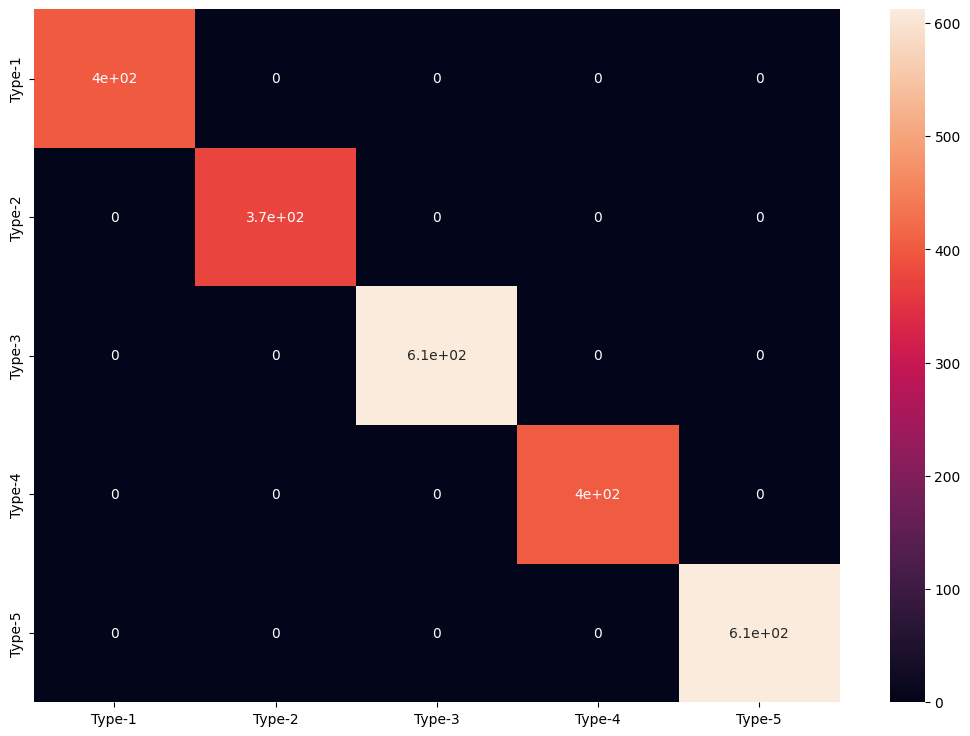

In [60]:
to_cm = pd.DataFrame(array, index = [i for i in ["Type-1","Type-2","Type-3","Type-4","Type-5"]],
                  columns = [i for i in ["Type-1","Type-2","Type-3","Type-4","Type-5"]])
plt.figure(figsize = (13,9))
sn.heatmap(to_cm, annot=True)

In [61]:
model.save("cnn_model.keras")


In [71]:
import numpy as np
from scipy.io import wavfile

# Load the wav file
sample_rate, data = wavfile.read("C:/Users/mubas/OneDrive/Desktop/Mubashir/Electrical project/power check by lstm/wave8000.wav")

# Print info
print(f"Sample Rate: {sample_rate}, Data Shape: {data.shape}")

# Convert to float32 if it's not already
data = data.astype(np.float32)

# Normalize between -1 and 1 if necessary (depends on your recording scale)
data = data / np.max(np.abs(data))

# Define chunk size
chunk_size = 128

# Trim the data to make it divisible by chunk size
num_chunks = len(data) // chunk_size
data_trimmed = data[:num_chunks * chunk_size]

# Reshape into (num_chunks, 128)
X = data_trimmed.reshape(num_chunks, chunk_size)

print(f"Final input shape: {X.shape}")  # Should be like (7198, 128) or similar


Sample Rate: 8000, Data Shape: (43008,)
Final input shape: (336, 128)


In [72]:
model= tf.keras.models.load_model("cnn_model.keras")

In [73]:
pred=model.predict(X.reshape(X.shape[0], X.shape[1], 1))
pred_class = np.argmax(pred)
print(pred_class)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3


In [75]:
class_mapping = {
    1: "Normal",
    2: "3rd harmonic wave",
    3: "5th harmonic wave",
    4: "Voltage dip",
    5: "transient"
}
pred_class = class_mapping.get(pred_class, "Unknown")

In [76]:
print(f"Predicted class: {pred_class}")

Predicted class: 5th harmonic wave
